# Exemples de manipulation de variables 2D et visualisation

Dans ce notebook, nous allons ouvrir un fichier netcdf, le parcourir et le manipuler et le visualiser

## 1. Ouverture du netcdf et affichage de ses attributs, variables

In [8]:
from netCDF4 import Dataset, num2date
from glob import glob

fname=glob('/home/rdussurget/FormationPython/data/CMEMS*.nc4')[0]
nc=Dataset(fname,'r')

print nc

<type 'netCDF4.Dataset'>
root group (NETCDF4 file format):
    CDI: Climate Data Interface version 1.7.0 (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.0
    source: IBI-MFC (PdE Production Center)
    institution: Puertos del Estado (PdE)
    nco_openmp_thread_number: 1
    title: Ocean 3D IBI hourly mean fields
    easting: longitude
    northing: latitude
    references: http://marine.copernicus.eu/
    domain_name: IBI36
    field_type: mean
    field_date: 20171004
    field_julian_date: 24748.f
    comment: Class1 metrics
    julian_day_unit: Hours since 1950-01-01 00:00:00
    forecast_range: 01-day_hindcast
    forecast_type: hindcast
    bulletin_date: 2017-10-05
    bulletin_type: Operational
    longitude_min: -7.5555553f
    longitude_max: -0.77756983f
    latitude_min: 43.305557f
    latitude_max: 48.27793f
    z_min: 0.49402538f
    z_max: 4833.2905f
    contact: mailto: servicedesk.cmems@mercator-ocean.eu
    netcdf_version_id: 4.4.3
    CDO: Climate Data Operators ver

### Chargement des variables

On ouvre et on charge les variables lon, lat, time(avec conversion en objets ```datetime.datetime```) et thetao (température)

In [9]:
lon=nc.variables['longitude']
lat=nc.variables['latitude']
time=num2date(nc.variables['time'],nc.variables['time'].units)
T=nc.variables['thetao'][:]

print T.shape

(24, 48, 180, 245)


# Plot 2D de la température

On affiche le 1er pas de temps, et la couche de surface.

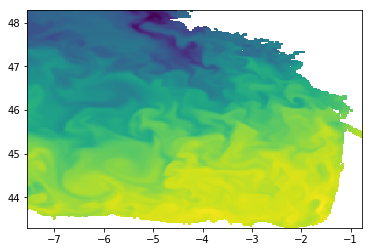

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.pcolormesh(lon,lat,T[0,0,:])
plt.show()

## Plot de la température moyenne sur les 24h de données

On calcule la moyenne temporelle de la SST (moyenne le long de l'axe des lon, puis des lat).

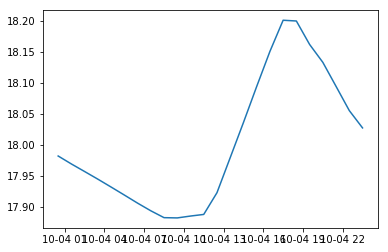

In [18]:
%matplotlib inline

mn=T[:,0,:,:].mean(axis=2).mean(axis=1)

plt.plot(time,mn)
plt.show()

## Et voilà!!